## **Actividad 1 - Parte 1 (Logit a Probit)**
- **A01232580 - Víctor Benito García Rocha**

In [42]:
import pandas as pd # Manipulación de datos

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# Cargar dataset
pima = pd.read_csv("diabetes.csv", header=1, names=col_names)

In [43]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [44]:
# Dividir dataset en features y target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Variable objetivo

In [45]:
# Dividir dataset en training y testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [46]:
X.head()

,pregnant,insulin,bmi,age,glucose,bp,pedigree
0,1,0,26.6,31,85,66,0.351
1,8,0,23.3,32,183,64,0.672
2,1,94,28.1,21,89,66,0.167
3,0,168,43.1,33,137,40,2.288
4,5,0,25.6,30,116,74,0.201


In [47]:
from statsmodels.discrete.discrete_model import Probit

# Ajustar modelo
probit = Probit(y_train, X_train)  # Pass y_train and X_train as arguments
probit_fit = probit.fit()  # Fit the model

# Predecir
y_pred = probit_fit.predict(X_test)  # Use the fitted model to predict

Optimization terminated successfully.
         Current function value: 0.614238
         Iterations 5


In [48]:
from sklearn import metrics

# Convertir probabilidades predichas a etiquetas de clase binarias
y_pred_binary = (y_pred > 0.5).astype(int)  # Usar un umbral de 0.5

cnf_matrix = metrics.confusion_matrix(
    y_test, y_pred_binary)  # Usar predicciones binarias
cnf_matrix

array([[112,  11],
       [ 50,  19]])

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

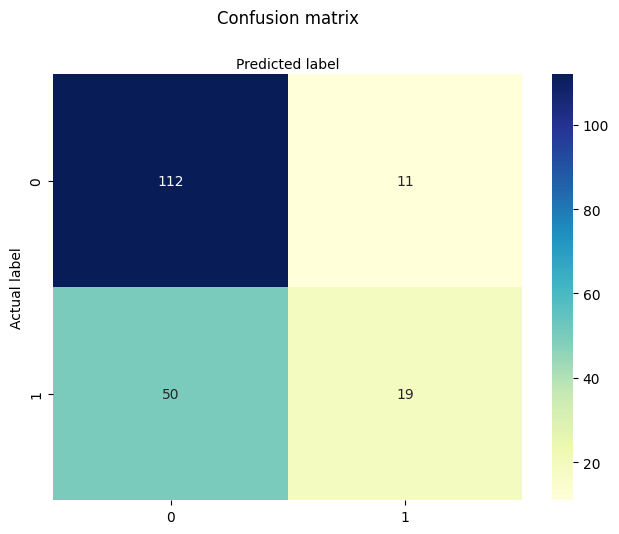

In [50]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Crear heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

In [51]:
from sklearn.metrics import classification_report
target_names = ['sin diabetes', 'con diabetes']

# Convertir probabilidades predichas a etiquetas de clase binarias
y_pred_binary = (y_pred > 0.5).astype(int)

# Usar predicciones binarias
print(classification_report(y_test, y_pred_binary, target_names=target_names))

              precision    recall  f1-score   support

sin diabetes       0.69      0.91      0.79       123
con diabetes       0.63      0.28      0.38        69

    accuracy                           0.68       192
   macro avg       0.66      0.59      0.58       192
weighted avg       0.67      0.68      0.64       192



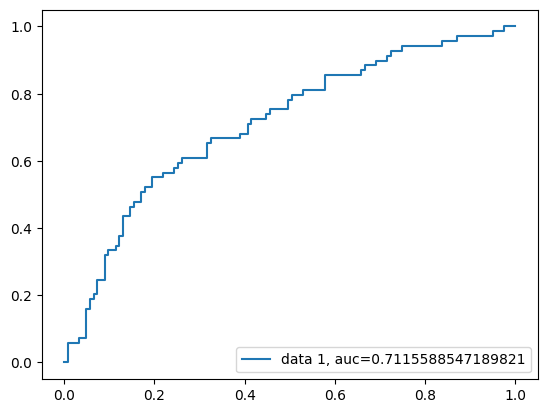

In [52]:
# Obtener probabilidades predichas del modelo ajustado
y_pred_proba = probit_fit.predict(X_test)

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label="data 1, auc=" + str(auc))
plt.legend(loc=4)
plt.show()